# **Exploratory Data Analysis**

In [1]:
%pip install numpy matplotlib seaborn

  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Configurações globais de visualização
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)

In [27]:
df = pd.read_csv('../data/processed/chuva_moc.csv', parse_dates=['data'])
df = df.sort_values('data').set_index('data')

In [28]:
df.dtypes

precipitacao_mm    float64
temp_media         float64
umidade_media      float64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7208 entries, 2003-01-01 to 2024-12-31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   precipitacao_mm  7208 non-null   float64
 1   temp_media       7208 non-null   float64
 2   umidade_media    7208 non-null   float64
dtypes: float64(3)
memory usage: 225.2 KB


In [30]:
df.head()

,precipitacao_mm,temp_media,umidade_media
data,,,
2003-01-01,7.0,22.8,89.3
2003-01-02,11.2,23.0,89.8
2003-01-03,7.8,22.4,93.1
2003-01-04,52.2,24.1,81.8
2003-01-05,20.8,23.0,87.1


In [31]:
df.tail()

,precipitacao_mm,temp_media,umidade_media
data,,,
2024-12-27,0.0,26.0,60.7
2024-12-28,10.6,25.0,70.2
2024-12-29,1.6,23.7,74.3
2024-12-30,0.0,24.7,64.1
2024-12-31,0.0,22.8,75.7


In [32]:
df['precipitacao_mm'].describe()

count    7208.000000
mean        2.351609
std         8.161729
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       116.800000
Name: precipitacao_mm, dtype: float64

## **Visualização geral da série temporal**

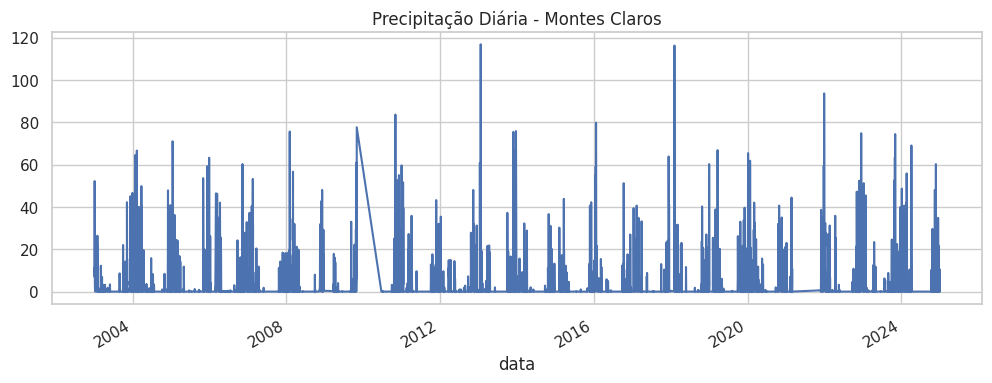

In [33]:
df['precipitacao_mm'].plot(title='Precipitação Diária - Montes Claros');

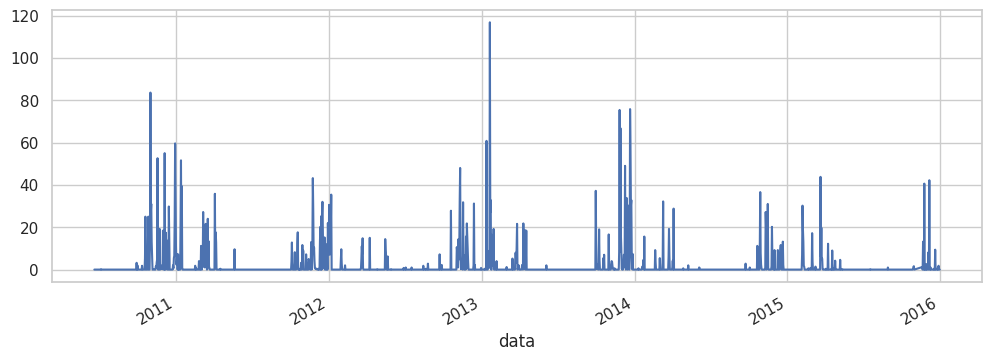

In [44]:
df['2010': '2015']['precipitacao_mm'].plot();

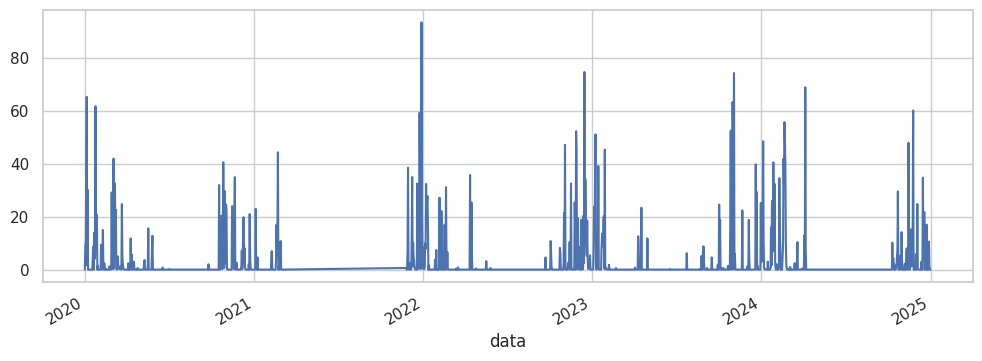

In [37]:
df['2020':]['precipitacao_mm'].plot();

In [52]:
# Extrai o ano para cada registro
df['ano'] = df.index.year

# Conta quantos registros (dias) existem por ano
dias_por_ano = df.groupby('ano').size()

print(dias_por_ano)

ano
2003    354
2004    356
2005    294
2006    325
2007    359
2008    331
2009    222
2010    190
2011    359
2012    358
2013    363
2014    365
2015    347
2016    366
2017    365
2018    331
2019    365
2020    366
2021     96
2022    365
2023    365
2024    366
dtype: int64


In [49]:
# Filtra apenas os dias com chuva > 0
dias_chuvosos_por_ano = df[df['precipitacao_mm'] > 0].groupby('ano').size()

print(dias_chuvosos_por_ano)

ano
2003     55
2004    105
2005     83
2006    104
2007     64
2008     90
2009     45
2010     43
2011     90
2012     62
2013     81
2014     50
2015     50
2016     70
2017     65
2018     79
2019     65
2020    107
2021     43
2022     88
2023     73
2024     93
dtype: int64


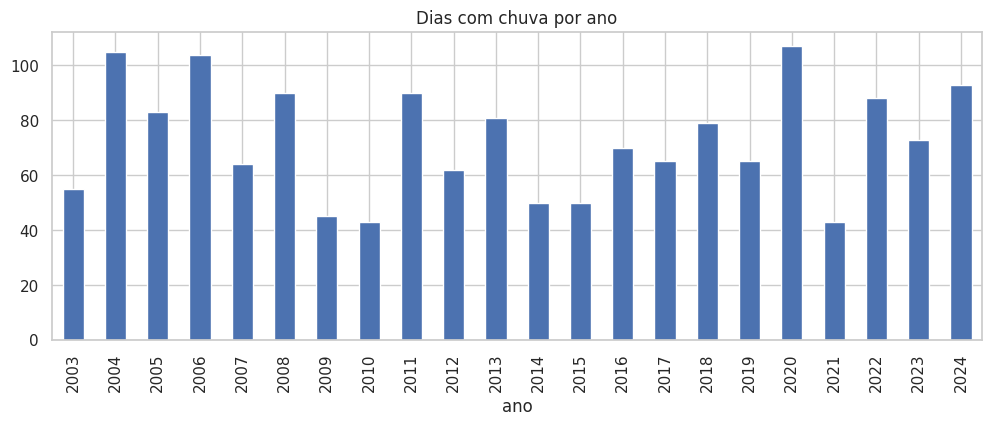

In [46]:
df['ano'] = df.index.year
dias_com_chuva = df[df['precipitacao_mm'] > 0].groupby('ano').size()
dias_com_chuva.plot(kind='bar', title='Dias com chuva por ano');

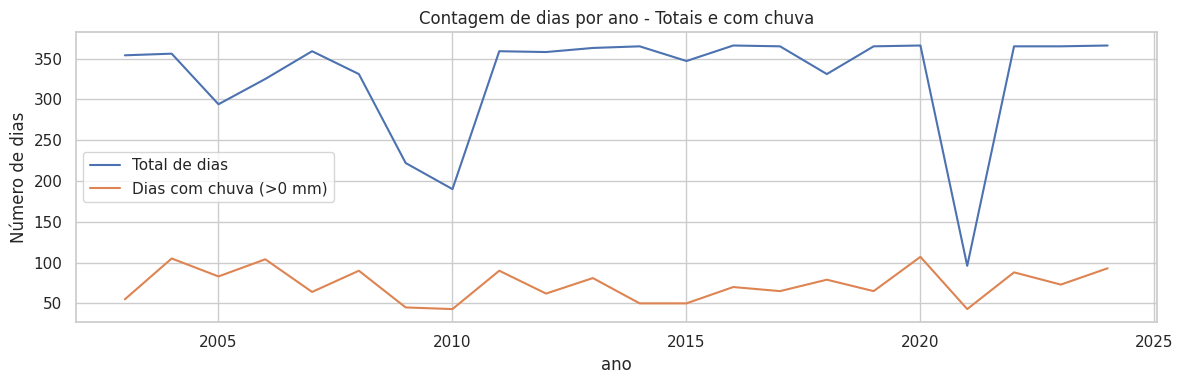

In [51]:
plt.figure(figsize=(12, 4))
dias_por_ano.plot(label='Total de dias')
dias_chuvosos_por_ano.plot(label='Dias com chuva (>0 mm)')
plt.ylabel('Número de dias')
plt.title('Contagem de dias por ano - Totais e com chuva')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='mes', ylabel='precipitacao_mm'>

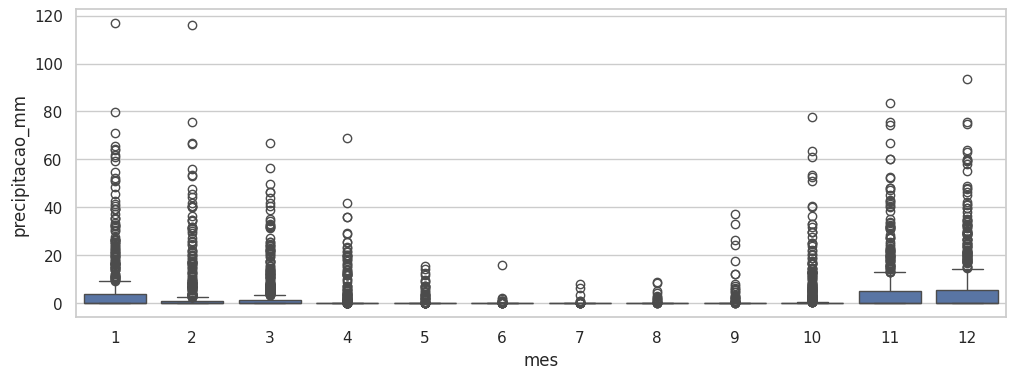

In [38]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='precipitacao_mm', data=df)

**Contar dias com chuva > X mm por mês (para definir extremos):**

In [54]:
extremos = df[df['precipitacao_mm'] > 50]
extremos['mes'].value_counts().sort_index()

mes
1     13
2      7
3      2
4      1
10     6
11     8
12    11
Name: count, dtype: int64

**Calcular a precipitação total por mês (acumulada):**

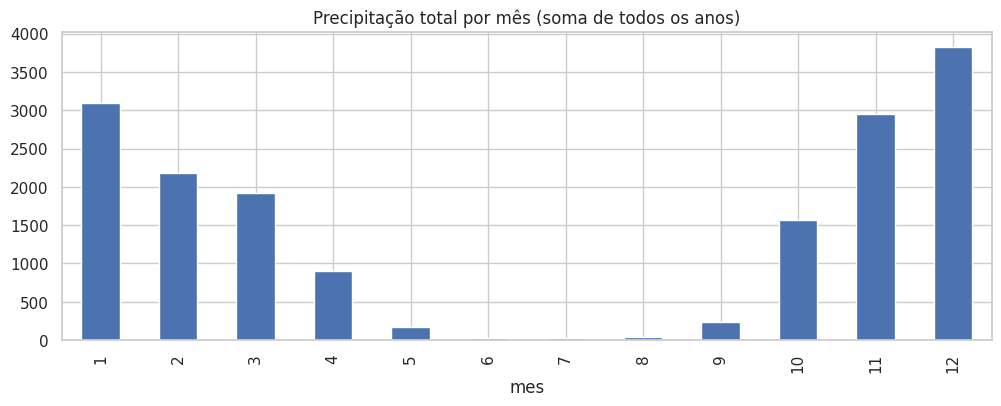

In [56]:
df.groupby('mes')['precipitacao_mm'].sum().plot(kind='bar', title='Precipitação total por mês (soma de todos os anos)');

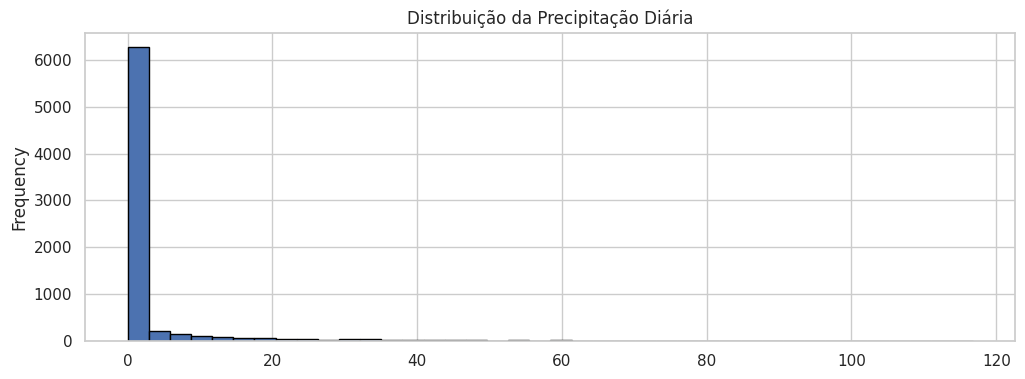

In [34]:
df['precipitacao_mm'].plot(kind='hist', bins=40, edgecolor='black', title='Distribuição da Precipitação Diária');

In [ ]:
# Valores ausentes
df['precipitacao_mm'].isna().sum()

np.int64(0)

In [ ]:
# Dias com chuva = 0 mm
(df['precipitacao_mm'] == 0).sum()

np.int64(5603)

In [43]:
# Percentual de dias sem chuva
(df['precipitacao_mm'] == 0).mean() * 100

np.float64(77.7330743618202)

# **Picos de precipitação**

>Picos de chuva extrema têm um papel desproporcional na dinâmica da umidade do solo, podendo causar encharcamento, erosão ou recarga anormal do solo. Eles também podem ser outliers (erros ou eventos raros).

Objetivo:
* Identificar os dias de maior precipitação

* Ver quando esses picos ocorrem

* Avaliar se são consistentes com o clima local ou suspeitos

* Preparar uma abordagem para tratá-los (usar, suavizar, excluir...)

### Quais são os maiores valores de precipitação?

In [60]:
df['precipitacao_mm'].sort_values(ascending=False).head(10)

data
2013-01-20    116.8
2018-02-04    116.2
2021-12-28     93.6
2010-11-01     83.6
2016-01-21     79.8
2009-10-30     77.6
2013-12-21     75.8
2008-02-01     75.6
2013-11-26     75.4
2022-12-15     74.8
Name: precipitacao_mm, dtype: float64

In [59]:
top_picos = df.sort_values(by='precipitacao_mm', ascending=False).head(10)
print(top_picos)

            precipitacao_mm  temp_media  umidade_media  mes   ano
data                                                             
2013-01-20            116.8        21.8           92.2    1  2013
2018-02-04            116.2        19.5           92.0    2  2018
2021-12-28             93.6        21.0           84.8   12  2021
2010-11-01             83.6        24.5           77.3   11  2010
2016-01-21             79.8        22.0           85.1    1  2016
2009-10-30             77.6        20.9           93.8   10  2009
2013-12-21             75.8        21.2           91.6   12  2013
2008-02-01             75.6        22.9           87.5    2  2008
2013-11-26             75.4        21.4           87.0   11  2013
2022-12-15             74.8        20.5           86.4   12  2022


### Quando esses picos ocorreram? Existe padrão?

**Perguntas para refletir:**

- Aconteceram sempre no verão? (esperado)
- Estão concentrados em poucos anos?
- Há picos muito distantes dos demais? (ex: 30 mm → 50 mm → 120 mm)

In [61]:
top_picos['ano'] = top_picos.index.year
top_picos['mes'] = top_picos.index.month

In [62]:
top_picos[['precipitacao_mm', 'ano', 'mes']]

,precipitacao_mm,ano,mes
data,,,
2013-01-20,116.8,2013,1
2018-02-04,116.2,2018,2
2021-12-28,93.6,2021,12
2010-11-01,83.6,2010,11
2016-01-21,79.8,2016,1
2009-10-30,77.6,2009,10
2013-12-21,75.8,2013,12
2008-02-01,75.6,2008,2
2013-11-26,75.4,2013,11


### Visualização: onde estão os picos?

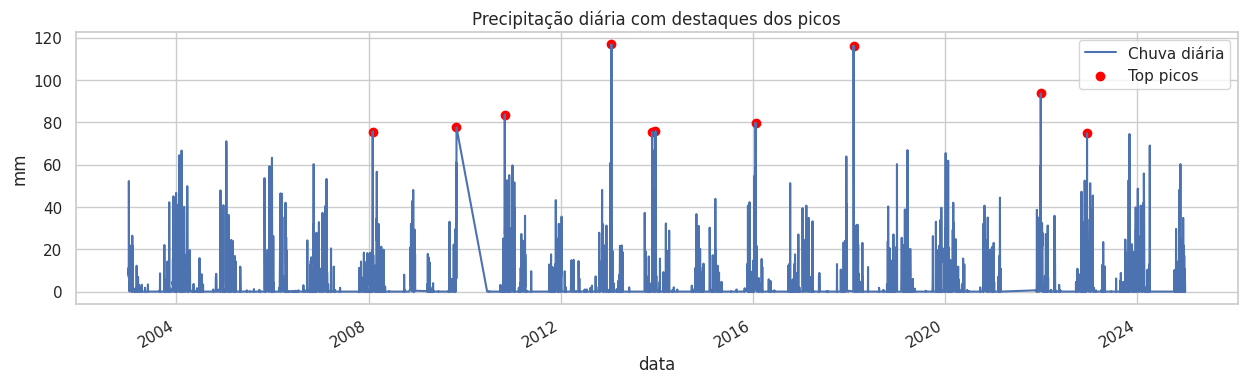

In [63]:
plt.figure(figsize=(15, 4))
df['precipitacao_mm'].plot(label='Chuva diária')
plt.scatter(top_picos.index, top_picos['precipitacao_mm'], color='red', label='Top picos')
plt.title('Precipitação diária com destaques dos picos')
plt.ylabel('mm')
plt.legend()
plt.grid(True)

48 dias com chuva > 50 mm


<Axes: title={'center': 'Dias com chuva > 50 mm por ano'}, xlabel='ano'>

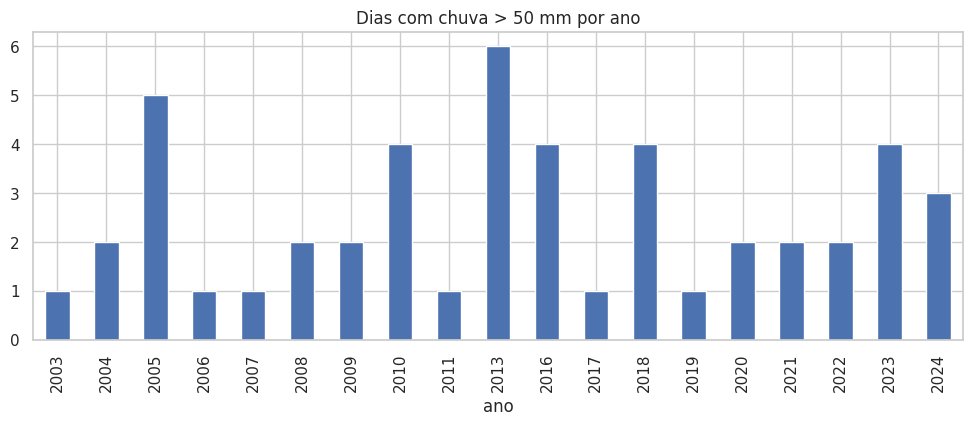

In [66]:
chuvas_fortes = df[df['precipitacao_mm'] > 50]
print(f'{len(chuvas_fortes)} dias com chuva > 50 mm')

chuvas_fortes['ano'].value_counts().sort_index().plot(kind='bar', title='Dias com chuva > 50 mm por ano')